### **Read in Data**


In [ ]:
import pandas as pd

scores_data = pd.read_csv('Expanded_data_with_more_features.csv')
scores_data.head(10)

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
5,5,female,group B,associate's degree,standard,none,married,regularly,yes,1.0,school_bus,5 - 10,73,84,79
6,6,female,group B,some college,standard,completed,widowed,never,no,1.0,private,5 - 10,85,93,89
7,7,male,group B,some college,free/reduced,none,married,sometimes,yes,1.0,private,> 10,41,43,39
8,8,male,group D,high school,free/reduced,completed,single,sometimes,no,3.0,private,> 10,65,64,68
9,9,female,group B,high school,free/reduced,none,married,regularly,yes,NaN,private,< 5,37,59,50


### **Clean Data**

####(1) Remove 'Unnamed 0'
\\
Variable is duplicate of index, so column was removed.

In [ ]:
scores_data = scores_data.drop('Unnamed: 0', axis =1)

#### (2) Change variables of Weekly Study Hours
\\
For readability and standardization, factors of WklyStudyHours were changed to ranges.

In [ ]:
scores_data['WklyStudyHours'] = scores_data['WklyStudyHours'].str.replace("< 5", "0 - 5")
scores_data['WklyStudyHours'] = scores_data['WklyStudyHours'].str.replace("> 10", "10 +")
scores_data.head(10)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,0 - 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,0 - 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
5,female,group B,associate's degree,standard,none,married,regularly,yes,1.0,school_bus,5 - 10,73,84,79
6,female,group B,some college,standard,completed,widowed,never,no,1.0,private,5 - 10,85,93,89
7,male,group B,some college,free/reduced,none,married,sometimes,yes,1.0,private,10 +,41,43,39
8,male,group D,high school,free/reduced,completed,single,sometimes,no,3.0,private,10 +,65,64,68
9,female,group B,high school,free/reduced,none,married,regularly,yes,NaN,private,0 - 5,37,59,50


####(3) Formatting text of variables (group, degree, school_bus)
\\
For readability, "degree" and "group" were removed from the columns. For clarity, the TransportMeans column was altered to "bus" or "car".

In [ ]:
scores_data['EthnicGroup'] = scores_data['EthnicGroup'].str.replace("group", "")
scores_data['ParentEduc'] = scores_data['ParentEduc'].str.replace(" degree", "")
scores_data['TransportMeans'] = scores_data['TransportMeans'].str.replace("school_bus", "bus")
scores_data['TransportMeans'] = scores_data['TransportMeans'].str.replace("private", "car")
scores_data

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's,standard,none,married,regularly,yes,3.0,bus,0 - 5,71,71,74
1,female,C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,B,master's,standard,none,single,sometimes,yes,4.0,bus,0 - 5,87,93,91
3,male,A,associate's,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,C,some college,standard,none,married,sometimes,yes,0.0,bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,female,D,high school,standard,none,single,sometimes,no,2.0,bus,5 - 10,59,61,65
30637,male,E,high school,standard,none,single,regularly,no,1.0,car,5 - 10,58,53,51
30638,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,car,5 - 10,61,70,67
30639,female,D,associate's,standard,completed,married,regularly,no,3.0,bus,5 - 10,82,90,93


####(4) Fix NaNs

Check for null values

In [ ]:
scores_data.isna().sum()

Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

Number of Siblings: if 0.0, all NaN values for IsFirstChild can be 'yes'

In [ ]:
# There are 151 null values for 'IsFirstChild' when NrSiblings == 0
scores_data[scores_data['NrSiblings'] == 0.0].isna().sum()

Gender                   0
EthnicGroup            207
ParentEduc             198
LunchType                0
TestPrep               172
ParentMaritalStatus    131
PracticeSport           77
IsFirstChild           151
NrSiblings               0
TransportMeans         313
WklyStudyHours          81
MathScore                0
ReadingScore             0
WritingScore             0
dtype: int64

In [ ]:
# Fill these null values
filt = scores_data['NrSiblings'] == 0.0
scores_data.loc[filt, 'IsFirstChild'] = 'yes'
scores_data[filt].isna().sum()

Gender                   0
EthnicGroup            207
ParentEduc             198
LunchType                0
TestPrep               172
ParentMaritalStatus    131
PracticeSport           77
IsFirstChild             0
NrSiblings               0
TransportMeans         313
WklyStudyHours          81
MathScore                0
ReadingScore             0
WritingScore             0
dtype: int64

Check null values again

In [ ]:
scores_data.isna().sum()

Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            753
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

Calculate probabilities to determine filling NaN values based on other columns.
- fill transport means by lunch type
- fill marital status from correlation to education

In [ ]:
len(scores_data[(scores_data['ParentMaritalStatus'] == 'married')  & (scores_data['LunchType'] == 'standard')])/len(scores_data[scores_data['ParentMaritalStatus'] == 'married'])
len(scores_data[(scores_data['ParentEduc'] == 'high school')  & (scores_data['LunchType'] == 'free/reduced')])/len(scores_data[scores_data['LunchType'] == 'free/reduced'])
len(scores_data[(scores_data['ParentEduc'] == 'high school')  & (scores_data['ParentMaritalStatus'] == 'single')])/len(scores_data[scores_data['ParentEduc'] == 'high school'])
len(scores_data[(scores_data['LunchType'] == 'standard')  & (scores_data['TransportMeans'] == 'bus')])/len(scores_data[scores_data['LunchType'] == 'standard'])

0.5289123335845265

Testing above showed that conditional probabilities were not very high to justify filling NaN in remaining columns. Therefore, our decision was to drop all NaN values because the number of NaNs was small compared to the total size of the dataset.

In [ ]:
scores_data = scores_data.dropna()

Final check of null values

In [ ]:
scores_data.isna().sum()

Gender                 0
EthnicGroup            0
ParentEduc             0
LunchType              0
TestPrep               0
ParentMaritalStatus    0
PracticeSport          0
IsFirstChild           0
NrSiblings             0
TransportMeans         0
WklyStudyHours         0
MathScore              0
ReadingScore           0
WritingScore           0
dtype: int64

### **Three different types of visualizations and explain data**

####Relationship between math, reading, and writing scores

array([[<Axes: xlabel='MathScore', ylabel='MathScore'>,
        <Axes: xlabel='ReadingScore', ylabel='MathScore'>,
        <Axes: xlabel='WritingScore', ylabel='MathScore'>],
       [<Axes: xlabel='MathScore', ylabel='ReadingScore'>,
        <Axes: xlabel='ReadingScore', ylabel='ReadingScore'>,
        <Axes: xlabel='WritingScore', ylabel='ReadingScore'>],
       [<Axes: xlabel='MathScore', ylabel='WritingScore'>,
        <Axes: xlabel='ReadingScore', ylabel='WritingScore'>,
        <Axes: xlabel='WritingScore', ylabel='WritingScore'>]],
      dtype=object)

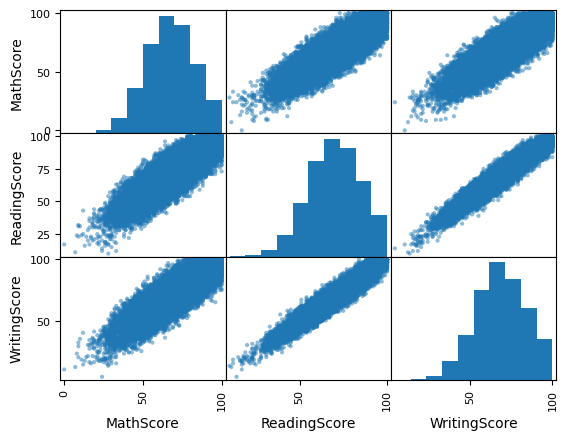

In [ ]:
pd.plotting.scatter_matrix(scores_data[['MathScore','ReadingScore','WritingScore']])

In [ ]:
columns = ['MathScore', 'ReadingScore', 'WritingScore']
scores_data[columns].corr()

,MathScore,ReadingScore,WritingScore
MathScore,1.000000,0.819204,0.808805
ReadingScore,0.819204,1.000000,0.952680
WritingScore,0.808805,0.952680,1.000000


*There is a strong correlation between the scores for math, reading, and writing; however, the highest correlation is between reading and writing scores. This can be seen in the graph because the graph is tighter (less variability).*



####Relationship between scores and parent variables

Text(0.5, 0.98, 'Side-by-side Boxplots of Math, Reading, and Writing Scores by Education Level and Marriage Status')

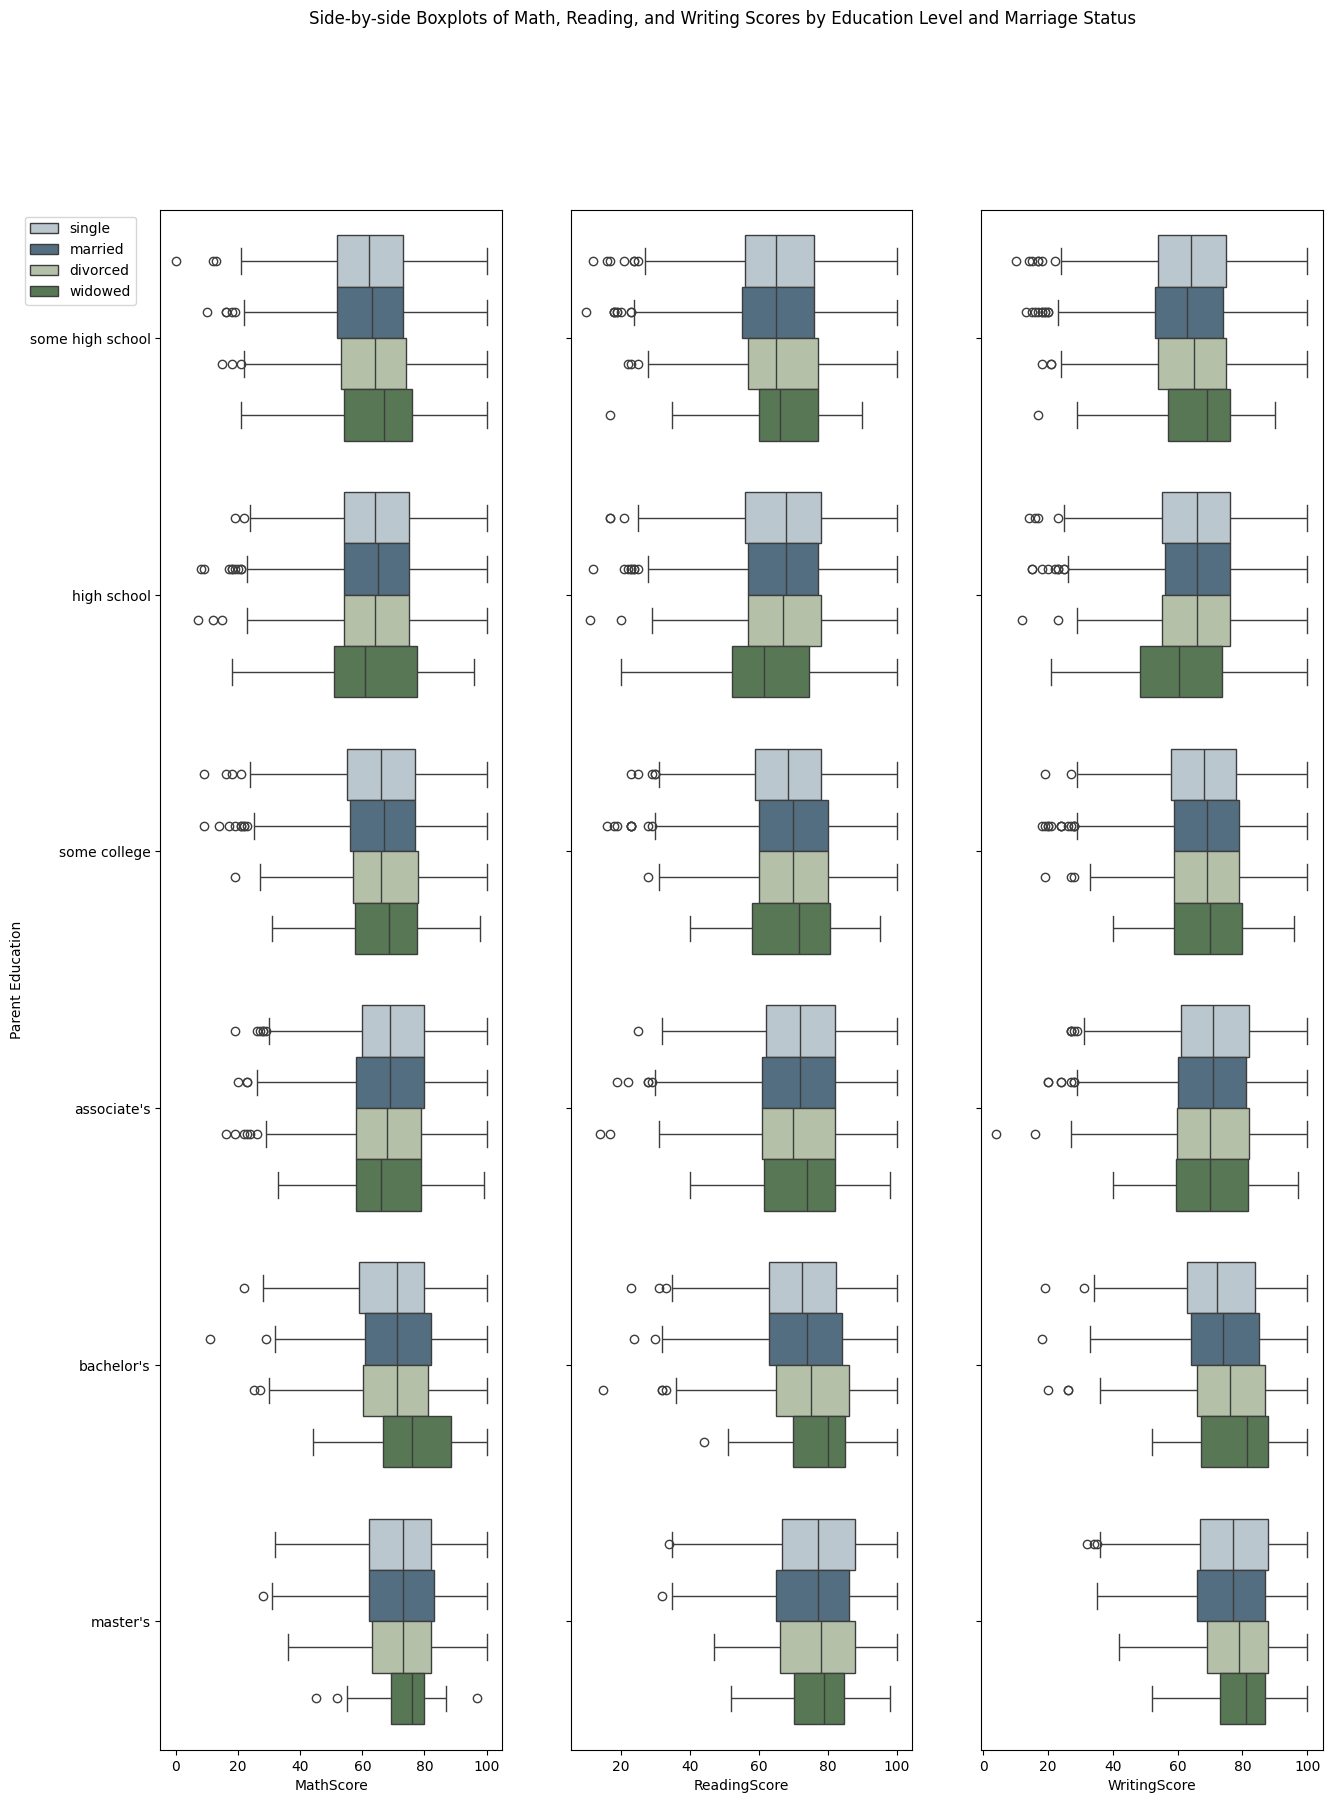

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort so that the graph order makes logical sense
scores_df_sort = scores_data.sort_values('ParentEduc', key =lambda col: col.map(
    {"master's":15,
     "bachelor's":13,
     "associate's":11,
     'some college': 9,
     'high school':7,
     'some high school': 5}
))

fig, (axes1, axes2, axes3) = plt.subplots(1,3, figsize = (15,20), sharey= True)

sns.boxplot(x = 'MathScore',
            y = 'ParentEduc',
            hue = 'ParentMaritalStatus',
            saturation = 0.3,
            data = scores_df_sort,
            ax = axes1, palette="Paired")

sns.boxplot(x = 'ReadingScore',
            y = 'ParentEduc',
            hue = 'ParentMaritalStatus',
            saturation = 0.3,
            data = scores_df_sort,
            ax = axes2, palette="Paired")

sns.boxplot(x = 'WritingScore',
            y = 'ParentEduc',
            hue = 'ParentMaritalStatus',
            saturation = 0.3,
            data = scores_df_sort,
            ax = axes3, palette="Paired")

axes1.legend(bbox_to_anchor = (-.05,1), loc= 'upper right')
axes2.get_legend().remove()
axes3.get_legend().remove()

axes1.set_ylabel('Parent Education')
fig.suptitle('Side-by-side Boxplots of Math, Reading, and Writing Scores by Education Level and Marriage Status')



In [ ]:
## Associated table to explain data

scores_data.groupby('ParentEduc').agg({'MathScore': 'mean', 'ReadingScore': 'mean', 'WritingScore': 'mean'}).style.highlight_max().highlight_min()

,MathScore,ReadingScore,WritingScore
ParentEduc,,,
associate's,68.551898,71.315105,70.553491
bachelor's,70.728460,73.552219,73.860313
high school,64.277807,67.269636,65.484186
master's,72.322485,75.964497,76.465237
some college,66.535281,69.254382,68.608764
some high school,62.518860,65.420353,63.563094


*There is a direct relationship between scores and parent education. Parents with the lowest education (some high school) had children with the lowest scores, and parents with the most education (master's degree) had children with the highest scores on average.*

In [ ]:
## Associated table to explain data

scores_data.groupby(['ParentMaritalStatus']).agg({'MathScore': 'mean', 'ReadingScore': 'mean', 'WritingScore': 'mean'}).style.highlight_max().highlight_min()

,MathScore,ReadingScore,WritingScore
ParentMaritalStatus,,,
divorced,66.712061,69.803359,68.946870
married,66.699946,69.459704,68.476599
single,66.256045,69.350604,68.506477
widowed,68.107817,70.700809,69.679245


*With similar values for highest and lowest, mean scores for math, writing, and reading, there does not appear to be a relationship between parent marital status and math scores.*

####Mean Math Scores by Number of Siblings

Text(0.5, 1.0, 'Mean Math Score by Number of Siblings')

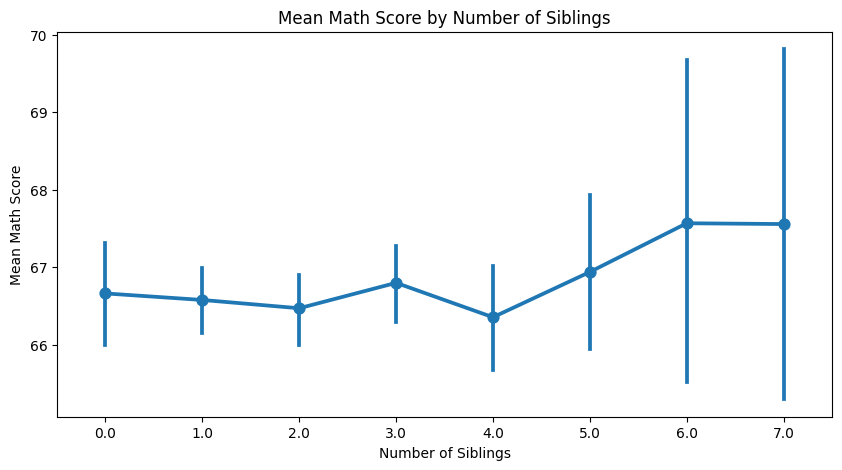

In [ ]:
import numpy as np
fig, axes = plt.subplots( figsize = (10,5))

sns.pointplot(x = 'NrSiblings',
            y = 'MathScore',


            data = scores_data,
            estimator = np.mean
            )

axes.set_ylabel("Mean Math Score")
axes.set_xlabel("Number of Siblings")
axes.set_title("Mean Math Score by Number of Siblings")


In [ ]:
## Associated table to explain data

scores_data.groupby('NrSiblings').agg({'MathScore': 'mean'})
#scores_data[['NrSiblings', 'MathScore']].corr()
#pd.crosstab(index = scores_data['NrSiblings'],
 #           columns = scores_data['MathScore'],
  #          normalize=True,
   #         ).style.highlight_max(axis=1)

,MathScore
NrSiblings,
0.0,66.663645
1.0,66.579434
2.0,66.472631
3.0,66.800097
4.0,66.356665
5.0,66.940211
6.0,67.568182
7.0,67.557895


*Number of siblings does not directly relate to the associated scores.*

####Relationship between Lunch Type and Math Scores

Text(0.5, 0.98, 'Side-by-side Violin Plots of Scores by Lunch Type')

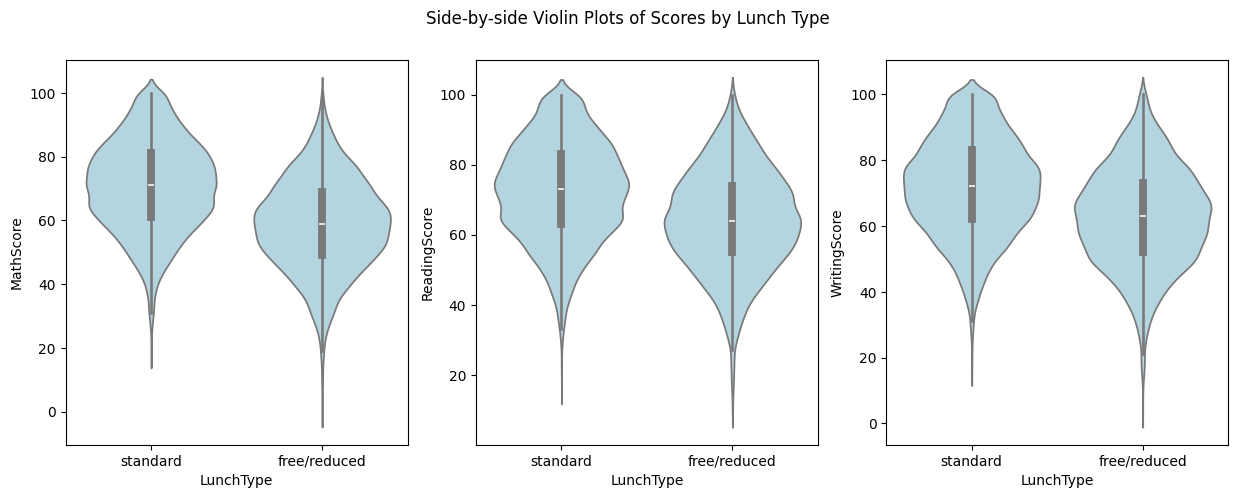

In [ ]:
fig, (axes1, axes2, axes3) = plt.subplots(1,3, figsize = (15,5))
sns.violinplot(x = 'LunchType', y = 'MathScore', color = 'Lightblue', data = scores_data, ax = axes1)
sns.violinplot(x = 'LunchType', y = 'ReadingScore', color = 'Lightblue', data = scores_data, ax = axes2)
sns.violinplot(x = 'LunchType', y = 'WritingScore', color = 'Lightblue', data = scores_data, ax = axes3)
fig.suptitle('Side-by-side Violin Plots of Scores by Lunch Type')

In [ ]:
## Associated table to explain data

scores_data.groupby('LunchType').agg({'MathScore': 'mean', 'ReadingScore': 'mean', 'WritingScore': 'mean'}).style.highlight_max()

,MathScore,ReadingScore,WritingScore
LunchType,,,
free/reduced,58.843566,64.248825,62.731933
standard,70.846706,72.375339,71.765353


*Students who do not receive a free or reduced pay lunch have higher average scores.*

####Scores by First Child

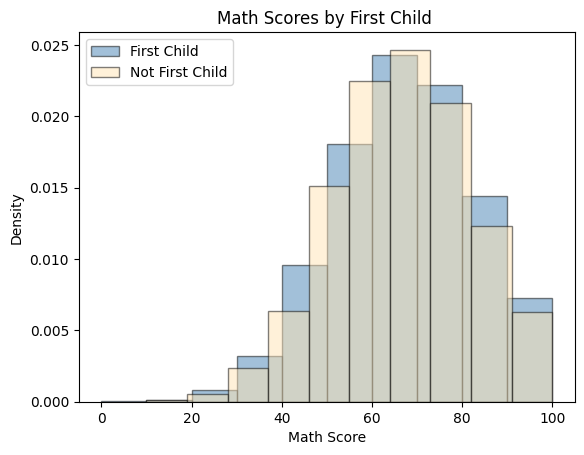

In [ ]:
fig, axes = plt.subplots()

axes.hist(scores_data[scores_data['IsFirstChild'] == 'yes']['MathScore'], alpha = 0.5, density = True, color='steelblue', edgecolor='black')
axes.hist(scores_data[scores_data['IsFirstChild'] != 'yes']['MathScore'], alpha = 0.5, density = True, color='moccasin', edgecolor='black')

axes.set_xlabel("Math Score")
axes.set_ylabel("Density")
axes.set_title("Math Scores by First Child ")
axes.legend(['First Child', 'Not First Child'])


In [ ]:
## Associated table to explain data

scores_data.groupby('IsFirstChild').agg({'MathScore': 'mean'})

,MathScore
IsFirstChild,
no,66.464401
yes,66.709026


*Being the first child does not have a direct effect on scores.*

### **Machine Learning for future data**

In [ ]:

predictors = ['ReadingScore', 'WritingScore', 'LunchType', 'ParentEduc', 'ParentMaritalStatus']
X_training = scores_data[predictors]
X_training['LunchType'] = (X_training['LunchType'].replace(['free/reduced', 'standard'], [1,0]))
X_training['ParentEduc'] = (X_training['ParentEduc'].replace(["master's",
     "bachelor's",
     "associate's",
     'some college',
     'high school',
     'some high school'], [5,4,3,2,1,0]))
X_training['ParentMaritalStatus'] = (X_training['ParentEduc'].replace(["single",
     "married",
     "widowed",
     'divorced'
     ], [0,1,2,3]))
Y_training = scores_data['MathScore']
from  sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_training, Y_training, random_state =1)



<ipython-input-23-4fa921c294ad>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_training['LunchType'] = (X_training['LunchType'].replace(['free/reduced', 'standard'], [1,0]))
<ipython-input-23-4fa921c294ad>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_training['ParentEduc'] = (X_training['ParentEduc'].replace(["master's",
<ipython-input-23-4fa921c294ad>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [ ]:
from sklearn.ensemble import RandomForestRegressor

math_scores_model = RandomForestRegressor(random_state=2, n_estimators=5)

math_scores_model.fit(X_train, y_train)

y_predict = math_scores_model.predict(X_val)


In [ ]:
from sklearn.metrics import mean_absolute_error

# Check error for testing data
mean_absolute_error(y_predict, y_val)

8.02923883964342

In [ ]:
math_scores_model.feature_importances_

array([0.77298682, 0.12995263, 0.03472354, 0.03047068, 0.03186633])

Text(0.5, 1.0, 'Feature importances for Math Scores')

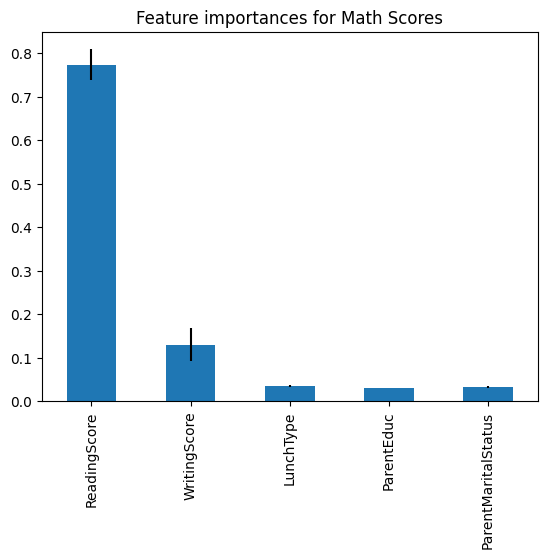

In [ ]:
math_scores_model.feature_importances_

importances = math_scores_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in math_scores_model.estimators_], axis=0)

model_importances = pd.Series(importances, index=predictors)

fig, ax = plt.subplots()
model_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances for Math Scores")

Model #2: Run without Other Scores (because they dominated the model in terms of feature importance)

In [ ]:
predictors = ['LunchType', 'ParentEduc', 'ParentMaritalStatus']
X_training = scores_data[predictors]
X_training['LunchType'] = (X_training['LunchType'].replace(['free/reduced', 'standard'], [1,0]))
X_training['ParentEduc'] = (X_training['ParentEduc'].replace(["master's",
     "bachelor's",
     "associate's",
     'some college',
     'high school',
     'some high school'], [5,4,3,2,1,0]))
X_training['ParentMaritalStatus'] = (X_training['ParentEduc'].replace(["single",
     "married",
     "widowed",
     'divorced'
     ], [0,1,2,3]))
Y_training = scores_data['MathScore']

X_train, X_val, y_train, y_val = train_test_split(X_training, Y_training, random_state =1)

<ipython-input-28-056b4fa30dee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_training['LunchType'] = (X_training['LunchType'].replace(['free/reduced', 'standard'], [1,0]))
<ipython-input-28-056b4fa30dee>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_training['ParentEduc'] = (X_training['ParentEduc'].replace(["master's",
<ipython-input-28-056b4fa30dee>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [ ]:
math_scores_model_2 = RandomForestRegressor(random_state=2, n_estimators=5)

math_scores_model_2.fit(X_train, y_train)

y_predict = math_scores_model_2.predict(X_val)


In [ ]:
# Check error for testing data
mean_absolute_error(y_predict, y_val)

11.36919154013981

Text(0.5, 1.0, 'Feature importances for Math Scores')

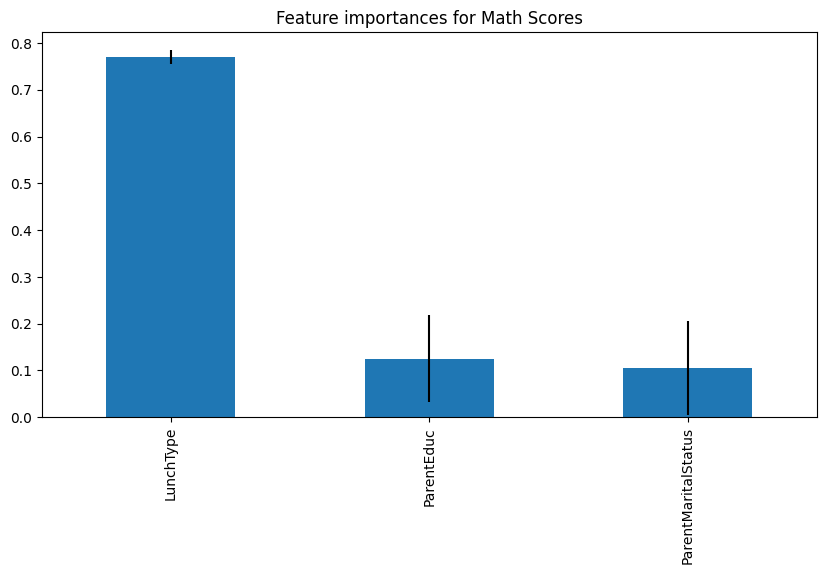

In [ ]:
math_scores_model_2.feature_importances_

importances = math_scores_model_2.feature_importances_
std = np.std([tree.feature_importances_ for tree in math_scores_model_2.estimators_], axis=0)

model_importances = pd.Series(importances, index=predictors)

fig, ax = plt.subplots(figsize = (10,5))
model_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances for Math Scores")

In [ ]:
# Download project
!pip install nbconvert
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc

from google.colab import drive
drive.mount("/content/drive")

!jupyter nbconvert --to pdf Scientific_Programming_Project_Final_Code.ipynb